# AMAZON ALEXA REVIEW RATINGS ANALYSIS


# DATA OVERVIEW

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews
- PLEASE MAKE SURE TO INSTALL WORDCLOUD:
pip install wordcloud

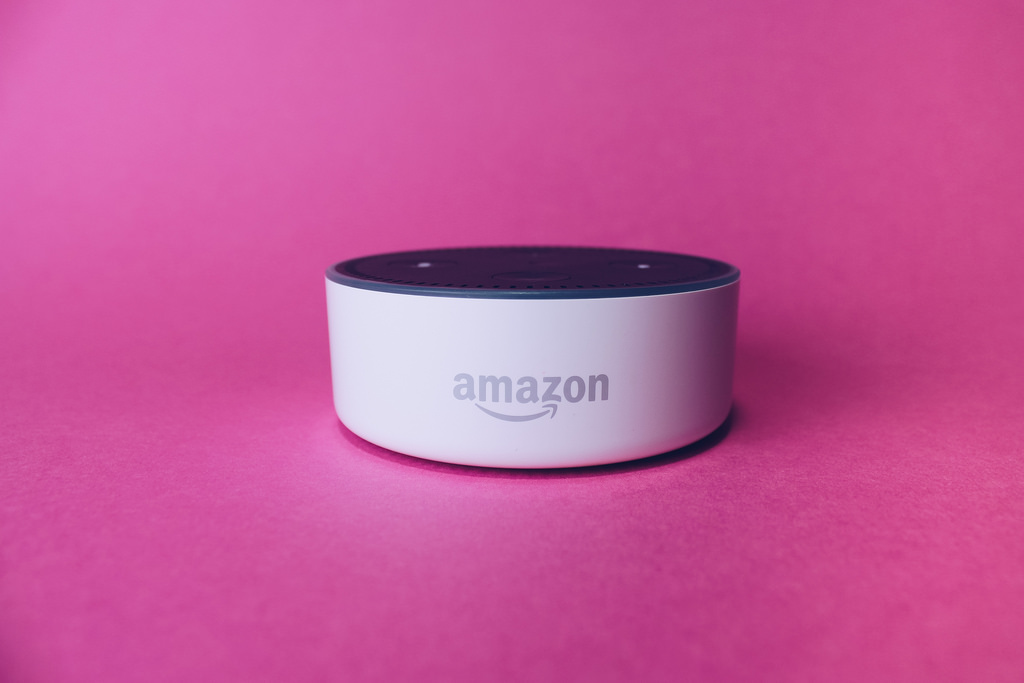

# IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
# %matplotlib inline

# Loading the Dataset

In [2]:
df_alexa = pd.read_csv('amazon_alexa.tsv', sep='\t') # sep paramater was provider because the delimter in the csv file was "indented spaces"

# EDA (Exploratory Data Analysis)

In [3]:
df_alexa.head() # returns the first 5 row in the dataframe

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df_alexa.keys() # returns the columns header in the dataframe

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
df_alexa.tail() # returns the last 5 rows in the dataframe

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df_alexa['verified_reviews'] # verified reviews made by the customers

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

# VISUALIZING THE DATA

In [7]:
positive = df_alexa[df_alexa['feedback']==1] # customers with postive feedbacks
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [8]:
negative = df_alexa[df_alexa['feedback']==0] # customers with negative feedback
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

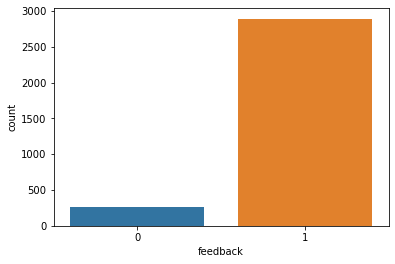

In [9]:
sns.countplot(df_alexa['feedback'], label = "Count") # a countplot chart showing customers negative and postive feedback

<AxesSubplot:xlabel='rating', ylabel='count'>

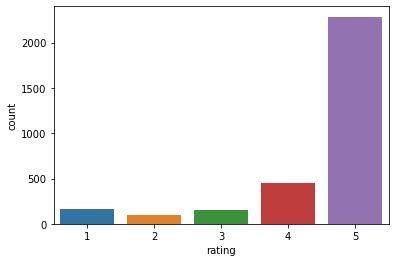

In [10]:
sns.countplot(x = 'rating', data = df_alexa) # a countplot chart showing customers ratings

<AxesSubplot:>

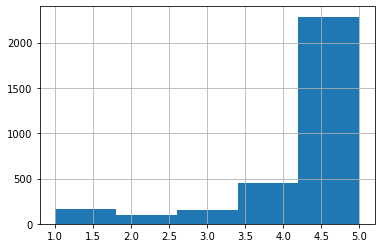

In [11]:
df_alexa['rating'].hist(bins = 5) # a histogram chart showing customers ratings

<AxesSubplot:xlabel='variation', ylabel='rating'>

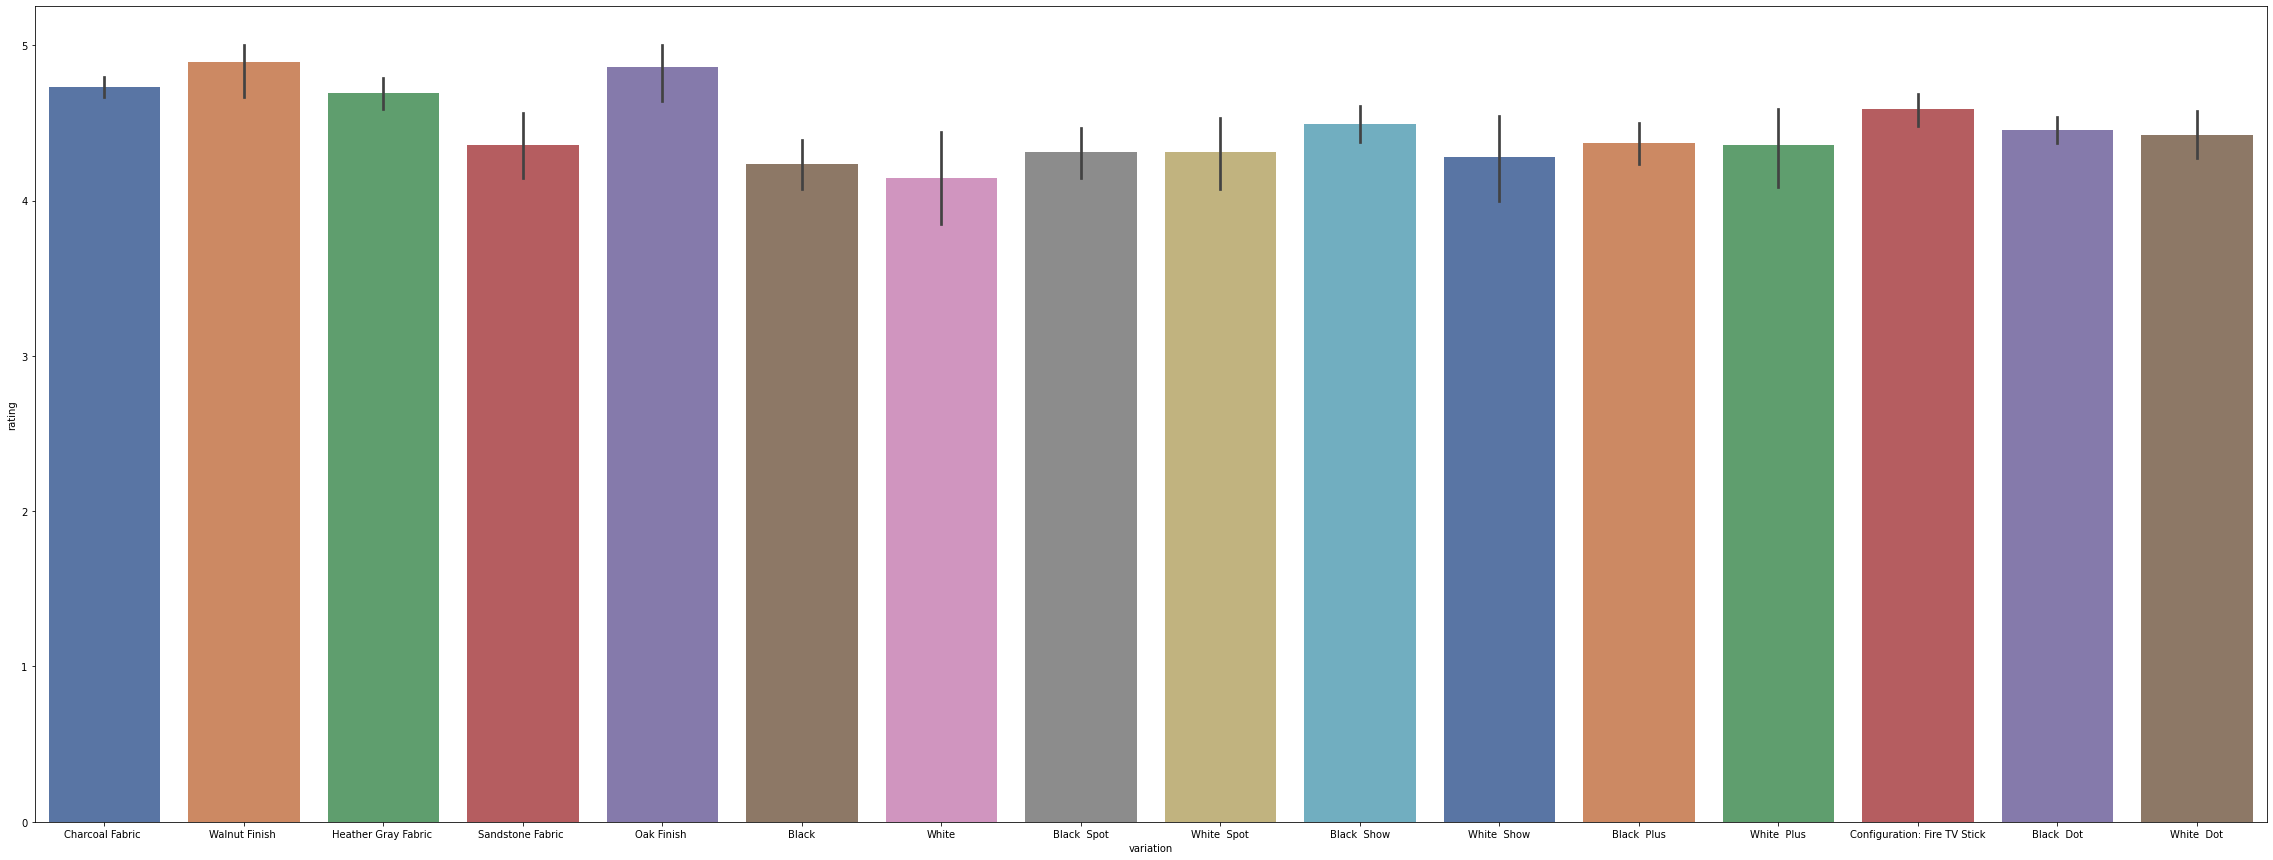

In [12]:
# A barplot chart showing alexa variation bought by customers and it ratings
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data=df_alexa, palette = 'deep')


# Text Preprocessing

In [13]:
#Creating a function to preprocess text
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    #Punctuation removal
    words = text.lower().split()
    words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]
    
    #Stopword removal
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    
    #Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    #Joining the text
    clean_text = ' '.join(words)
    return clean_text

# WORD CLOUD 

Word cloud is an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.
I used word cloud to show the most occuring words from the review made by the customers

In [14]:
words = df_alexa['verified_reviews'].apply(preprocess_text) # apply the text preprocessing function

In [15]:
words_as_one_string = ' '.join(word for word in df_alexa['verified_reviews']) #join all verified review as a string

In [16]:
words_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [17]:
len(words_as_one_string) #length of merge verified review

419105

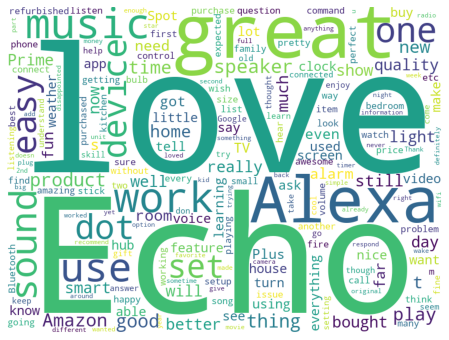

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    collocations = False, 
    width = 800,
    height = 600,
    background_color = 'white').generate(words_as_one_string)
plt.figure(figsize=(20,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# FEATURE ENGINEERING

Feature engineering is the process of using domain knowledge to extract or create features from raw data. Features are characteristics, properties, or attributes of the data that can help a machine-learning model to learn and make predictions. Feature engineering involves selecting relevant information from raw data and transforming it into a format that can be easily understood by a model

In [19]:
# CountVectorizer is a great tool provided by the scikit-learn library in Python.
# It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.
# This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis)
# We will be converting the "verified reviews" into vectors to get the most occuring/repeating words made by the customers

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [20]:
alexa_countvectorizer.shape # rows and columns of vectorize words

(3150, 4044)

In [21]:
type(alexa_countvectorizer)

scipy.sparse.csr.csr_matrix

In [22]:
print(vectorizer.vocabulary_) # repeated words in customers reviews

{'love': 2150, 'my': 2320, 'echo': 1160, 'loved': 2151, 'it': 1933, 'sometimes': 3289, 'while': 3945, 'playing': 2640, 'game': 1504, 'you': 4028, 'can': 588, 'answer': 256, 'question': 2794, 'correctly': 853, 'but': 559, 'alexa': 196, 'says': 3059, 'got': 1567, 'wrong': 4008, 'and': 250, 'answers': 259, 'the': 3578, 'same': 3044, 'as': 314, 'like': 2076, 'being': 435, 'able': 79, 'to': 3646, 'turn': 3721, 'lights': 2075, 'on': 2445, 'off': 2429, 'away': 367, 'from': 1476, 'home': 1722, 'have': 1652, 'had': 1616, 'lot': 2144, 'of': 2428, 'fun': 1485, 'with': 3971, 'this': 3601, 'thing': 3596, 'yr': 4035, 'old': 2440, 'learns': 2046, 'about': 81, 'dinosaurs': 1039, 'control': 827, 'play': 2637, 'games': 1505, 'categories': 619, 'has': 1644, 'nice': 2370, 'sound': 3308, 'when': 3939, 'music': 2316, 'well': 3929, 'received': 2854, 'gift': 1536, 'needed': 2347, 'another': 255, 'bluetooth': 483, 'or': 2474, 'something': 3287, 'easily': 1156, 'accessible': 91, 'found': 1464, 'smart': 3247, 's

In [23]:
print(alexa_countvectorizer.toarray()) # an array of matrixes

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
word_count_array = alexa_countvectorizer.toarray()

In [25]:
word_count_array[0,:] #grabs the first rows and all columns

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

'Love, Love, Love!!'

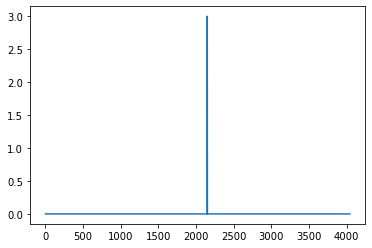

In [26]:
index = 13
plt.plot(word_count_array[index, :]) # a chart showing the occurence of word
df_alexa['verified_reviews'][index] # customer review

In [27]:
df_alexa['length'] = df_alexa['verified_reviews'].apply(len) # this line of code return the length of each review
df_alexa.head() # returns the first 5 rows

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:>

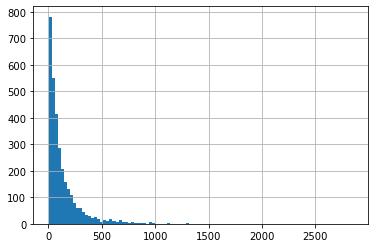

In [28]:
# customers who wrote lots of reviews
df_alexa['length'].hist(bins=100)

# Minimum Review

Getting the mininum review made the customer

In [29]:
min_char = df_alexa['length'].min() # get mininum length of review made
df_alexa[df_alexa['length'] == min_char]['verified_reviews'].iloc[0] # extract the review


'😍'

# Maximum Review

Getting the maximum review made by the customer

In [30]:
max_char = df_alexa['length'].max() # get mininum length of review made
df_alexa[df_alexa['length'] == max_char]['verified_reviews'].iloc[0] # extract the review


SyntaxError: invalid syntax (1205448030.py, line 2)

# Write up / Closing remarks

In this sentiment analysis project, we cover alot such as EDA(Exploratory Data Analysis), Text Processing with nltk, Data Visualization with Seaborn, Matplotlib, WordCloud and Feature Engineering with CountVectorizer.
In the project I explored the amazon alex review, the aim is to discover insights into consumer reviews and perform sentiment analysis on the data.
I started the project by performing exploratory data analysis on the dataset to analyze and investigate the dataset and summarize their main characteristics which gave me insight on how to go about performing sentiment analysis. After the EDA i went ahead to perform Data Visualization on the dataset to gain additional insight such as the customer ratings, postive and negative feedbacks, alexa variation.
I went to apply text preprocessing to remove redundant words then apply wordcloud to indicate the importance of each word in the customer reviews, feature engineering was also applied to the dataset to get the most occuring words in the customer review.
Lastly i show the minimum and maximum made by the customer.